In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('/content/placementdata.csv')

In [ ]:
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [ ]:
df.drop(columns=['StudentID'], inplace=True)

In [ ]:
df

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


In [ ]:
df["ExtracurricularActivities"] = df["ExtracurricularActivities"].map({"Yes": 1, "No": 0})
df["PlacementTraining"] = df["PlacementTraining"].map({"Yes": 1, "No": 0})
df["PlacementStatus"] = df["PlacementStatus"].map({"Placed": 1, "NotPlaced": 0})

In [ ]:
df

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,0,0,61,79,0
1,8.9,0,3,2,90,4.0,1,1,78,82,1
2,7.3,1,2,2,82,4.8,1,0,79,80,0
3,7.5,1,1,2,85,4.4,1,1,81,80,1
4,8.3,1,2,2,86,4.5,1,1,74,88,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,1,0,85,66,0
9996,7.4,0,1,0,90,4.8,0,0,84,67,1
9997,8.4,1,3,0,70,4.8,1,1,79,81,1
9998,8.9,0,3,2,87,4.8,1,1,71,85,1


In [ ]:
df.isnull().sum()

,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0
HSC_Marks,0


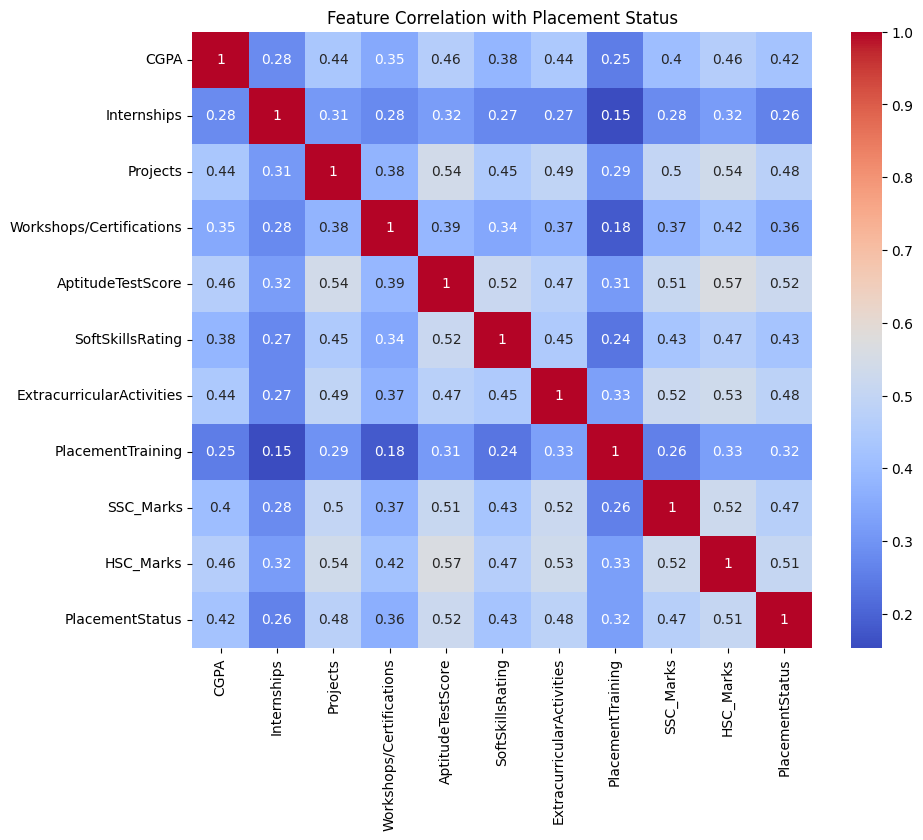

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Placement Status")
plt.show()

In [ ]:
X = df.drop("PlacementStatus", axis=1)
y = df["PlacementStatus"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)#Phle samjhega data me kya hai then transform kar dega.
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.47139169, -0.06556468,  1.12252363, ..., -1.66274047,
         1.32455626,  1.51440106],
       [-0.1536667 , -0.06556468, -0.0307047 , ...,  0.60141677,
        -0.78588907,  1.17849265],
       [ 0.78392088, -0.06556468,  1.12252363, ...,  0.60141677,
         0.65305093, -1.06089672],
       ...,
       [-0.46619589, -0.06556468, -1.18393304, ...,  0.60141677,
        -1.36146508, -0.94892725],
       [ 0.47139169, -0.06556468, -1.18393304, ..., -1.66274047,
        -1.36146508, -0.94892725],
       [ 0.78392088, -0.06556468,  1.12252363, ...,  0.60141677,
         1.22862693, -0.27711044]])

# Model Training

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Model Evaluation

In [ ]:
log_preds = log_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test)

In [ ]:
accuracy_score(y_test,log_preds)

0.7945

In [ ]:
print("\n📊 Logistic Regression Classification Report:\n")
print(classification_report(y_test, log_preds))


📊 Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1172
           1       0.74      0.77      0.76       828

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000



In [ ]:
print("📊 Random Forest Classification Report:\n")
print(classification_report(y_test, rf_preds))

📊 Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1172
           1       0.75      0.71      0.73       828

    accuracy                           0.78      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.78      0.78      0.78      2000



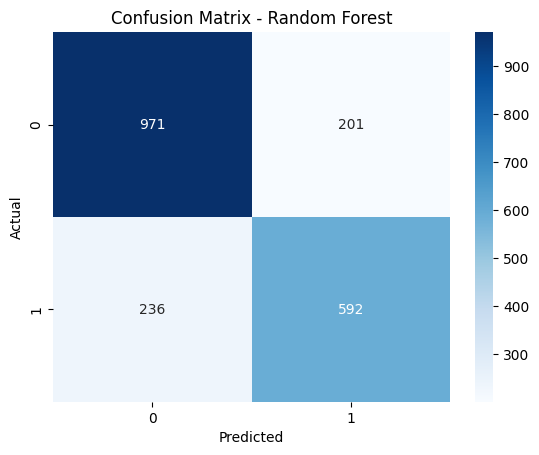

In [ ]:
cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

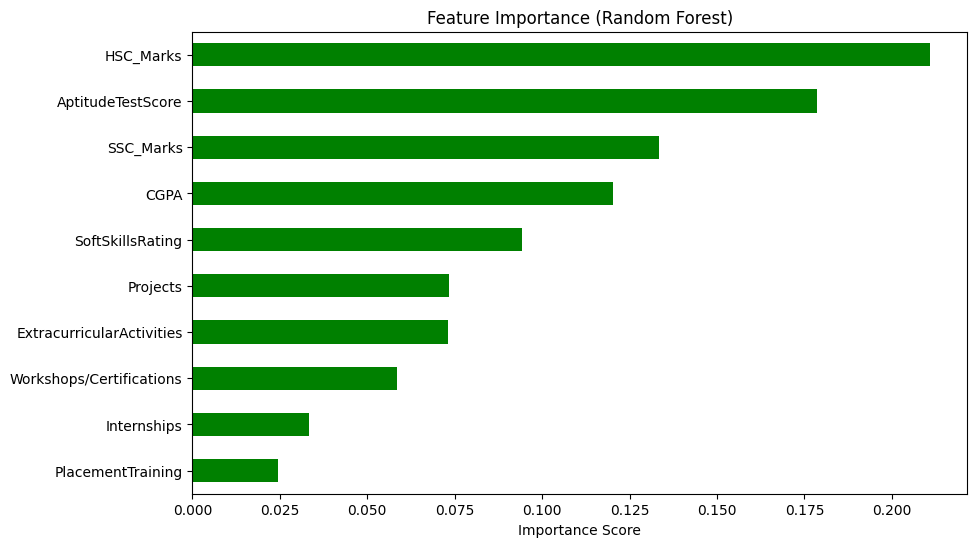

In [ ]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(10, 6), color='green')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

LogisticRegression()

Random Forest Accuracy: 0.7815

📊 Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1172
           1       0.75      0.71      0.73       828

    accuracy                           0.78      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.78      0.78      0.78      2000



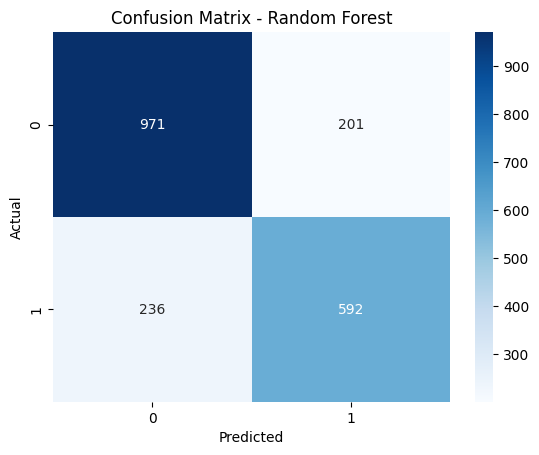

In [ ]:
# Evaluate Random Forest Model
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

print("\n📊 Random Forest Classification Report:\n")
print(classification_report(y_test, rf_preds))

cm_rf = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))

In [46]:
!pip install gradio


In [47]:
import pickle
import numpy as np

# Load your trained model
clf = pickle.load(open("model.pkl", "rb"))


In [50]:
X = df.drop("PlacementStatus", axis=1)


In [51]:
print(X.columns.tolist())


['CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks', 'HSC_Marks']


In [52]:
import pickle
import numpy as np
import gradio as gr

# Load your model
clf = pickle.load(open("model.pkl", "rb"))

# Prediction function
def predict_placement(cgpa, internships, projects, certifications, aptitude,
                      softskills, extracurricular, training, ssc, hsc):

    # Convert radio buttons to binary
    extracurricular = 1 if extracurricular == "Yes" else 0
    training = 1 if training == "Yes" else 0

    # Arrange inputs in correct order
    input_data = np.array([[cgpa, internships, projects, certifications,
                            aptitude, softskills,
                            extracurricular, training,
                            ssc, hsc]])

    # Predict using the model
    prediction = clf.predict(input_data)[0]

    return "✅ Placed" if prediction == 1 else "❌ Not Placed"

# Create Gradio UI
iface = gr.Interface(
    fn=predict_placement,
    inputs=[
        gr.Slider(0.0, 10.0, step=0.1, label="CGPA"),
        gr.Number(label="Number of Internships"),
        gr.Number(label="Number of Projects"),
        gr.Number(label="Workshops/Certifications Attended"),
        gr.Slider(0, 100, label="Aptitude Test Score"),
        gr.Slider(1, 10, label="Soft Skills Rating"),
        gr.Radio(["Yes", "No"], label="Extracurricular Activities"),
        gr.Radio(["Yes", "No"], label="Placement Training"),
        gr.Slider(0, 100, label="SSC Marks (%)"),
        gr.Slider(0, 100, label="HSC Marks (%)")
    ],
    outputs="text",
    title="🎓 Placement Prediction App",
    description="Fill in the student's profile to predict placement outcome."
)

# Launch app
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3e959f0dfeb5584b1f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


To fix the `PyngrokNgrokError` and run your Streamlit app using ngrok, you need to set your ngrok authtoken. You can get your authtoken from your ngrok dashboard.

It is recommended to store your authtoken securely in Colab's Secrets manager. Go to the "🔑" tab in the left panel, add a new secret named `NGROK_AUTH_TOKEN`, and paste your authtoken there.

After setting the authtoken, you can rerun the cell to start the Streamlit app and get the public URL.